<a href="https://colab.research.google.com/github/ZahraBehzad/learn-CNN/blob/main/paperMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

use Mean Squared Error (MSE) as the
loss function:

Using Mean Squared Error (MSE) as the loss function.
Epoch 1/100
23/23 - 9s - 401ms/step - loss: 1678.7437
Epoch 2/100
23/23 - 3s - 126ms/step - loss: 226.7510
Epoch 3/100
23/23 - 1s - 51ms/step - loss: 128.1494
Epoch 4/100
23/23 - 1s - 33ms/step - loss: 98.5607
Epoch 5/100
23/23 - 1s - 55ms/step - loss: 78.7810
Epoch 6/100
23/23 - 1s - 53ms/step - loss: 68.3132
Epoch 7/100
23/23 - 1s - 32ms/step - loss: 61.1111
Epoch 8/100
23/23 - 1s - 32ms/step - loss: 56.1648
Epoch 9/100
23/23 - 1s - 55ms/step - loss: 52.6082
Epoch 10/100
23/23 - 1s - 55ms/step - loss: 49.9903
Epoch 11/100
23/23 - 1s - 55ms/step - loss: 47.4277
Epoch 12/100
23/23 - 1s - 55ms/step - loss: 44.9083
Epoch 13/100
23/23 - 1s - 55ms/step - loss: 42.3703
Epoch 14/100
23/23 - 1s - 55ms/step - loss: 40.6334
Epoch 15/100
23/23 - 1s - 56ms/step - loss: 44.2205
Epoch 16/100
23/23 - 1s - 55ms/step - loss: 71.2142
Epoch 17/100
23/23 - 1s - 33ms/step - loss: 37.3563
Epoch 18/100
23/23 - 1s - 32ms/step - loss: 35.7615
Epoch 19/100
2

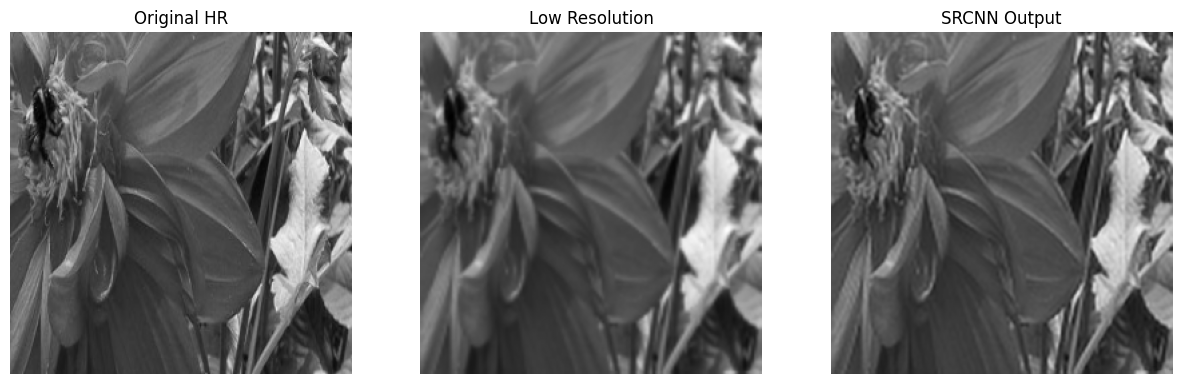

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

# کامپایل مدل با استفاده از MSE به عنوان تابع زیان
model.compile(optimizer='adam', loss='mse')
print("Using Mean Squared Error (MSE) as the loss function.")

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()

The loss is minimized using stochastic gradient descent
with the standard backpropagation

NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_train: False
NaN in x_train: False
NaN in y_t

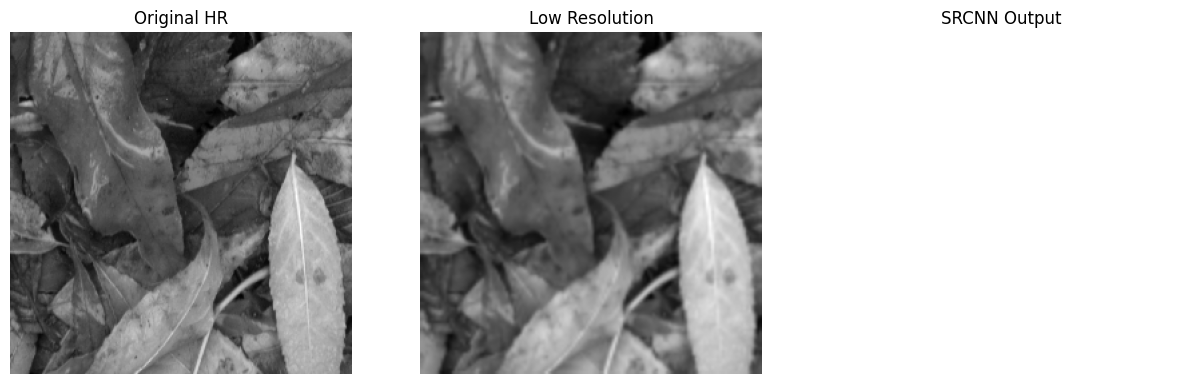

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# تعریف آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img = color.rgb2ycbcr(img)[:, :, 0]
    img = transform.resize(img, (img.shape[0]//scale, img.shape[1]//scale), anti_aliasing=True)
    img = transform.resize(img, (img.shape[0]*scale, img.shape[1]*scale), anti_aliasing=True)
    return img

# بارگذاری همه تصاویر
def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

dataset_path = '/content/drive/MyDrive/basicCNN/91images/'  # مسیر دیتاست
images = load_images(dataset_path)


# آماده‌سازی داده‌ها
x_train = []
y_train = []

for img in images:
    lr = prepare_lr(img)
    hr = color.rgb2ycbcr(img)[:, :, 0]
    x_train.append(lr)
    y_train.append(hr)
    print("NaN in x_train:", np.isnan(x_train).any())
    print("NaN in y_train:", np.isnan(y_train).any())

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)


# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

# کامپایل مدل با استفاده از MSE به عنوان تابع زیان
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)

# تست روی یک تصویر
idx = np.random.randint(0, len(images))
test_lr = np.expand_dims(prepare_lr(images[idx]), axis=(0, -1))
test_hr = color.rgb2ycbcr(images[idx])[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# محاسبه ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()

Epoch 1, Step 0, Loss: 11659.3193359375
Epoch 1, Step 10, Loss: 9690.7548828125
Epoch 1, Step 20, Loss: 9808.1865234375
Epoch 1, Step 30, Loss: 22067.408203125
Epoch 1, Step 40, Loss: 12411.7763671875
Epoch 1, Step 50, Loss: 8142.7939453125
Epoch 1, Step 60, Loss: 352.1495361328125
Epoch 1, Step 70, Loss: 126.33465576171875
Epoch 1, Step 80, Loss: 423.2801513671875
Epoch 1, Step 90, Loss: 87.36264038085938
Epoch 1, Step 100, Loss: 553.0050659179688
Epoch 1, Step 110, Loss: 291.39556884765625
Epoch 1, Step 120, Loss: 251.4634552001953
Epoch 1, Step 130, Loss: 83.18836212158203
Epoch 1, Step 140, Loss: 210.17324829101562
Epoch 1, Step 150, Loss: 91.92649841308594
Epoch 1, Step 160, Loss: 605.96142578125
Epoch 1, Step 170, Loss: 284.1671142578125
Epoch 1, Step 180, Loss: 655.02392578125
Epoch 1, Step 190, Loss: 237.23977661132812
Epoch 1, Step 200, Loss: 487.29266357421875
Epoch 1, Step 210, Loss: 812.951171875
Epoch 1, Step 220, Loss: 237.33493041992188
Epoch 2, Step 0, Loss: 64.17508697

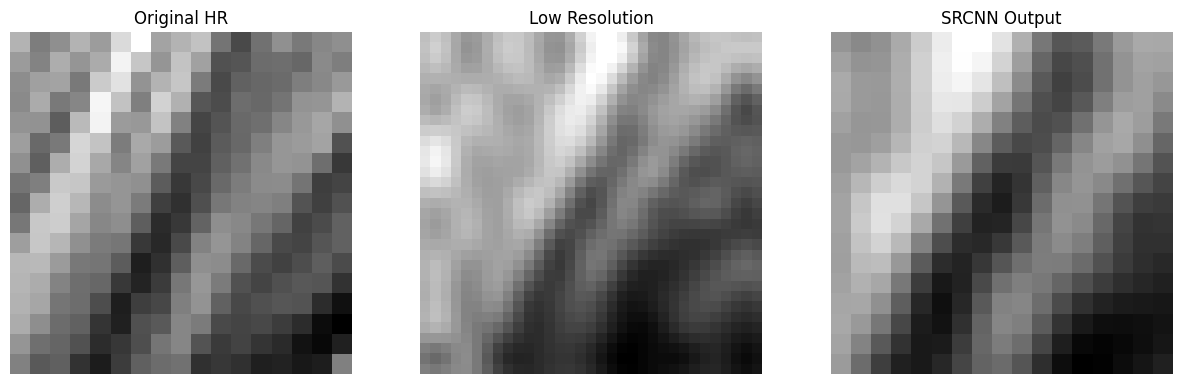

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# تعریف توابع کمکی
def random_crop(img, crop_size):
    h, w = img.shape[:2]
    if h < crop_size or w < crop_size:
        raise ValueError("Image smaller than crop size")
    top = np.random.randint(0, h - crop_size)
    left = np.random.randint(0, w - crop_size)
    return img[top:top+crop_size, left:left+crop_size]

def prepare_lr_hr(img_y, scale=3, fsub=33):
    try:
        hr_sub = random_crop(img_y, fsub)
        sigma = 1.0
        blurred = transform.pyramid_reduce(hr_sub, sigma=sigma, channel_axis=None)
        lr_down = transform.resize(blurred, (fsub//scale, fsub//scale), order=3, anti_aliasing=True)
        lr = transform.resize(lr_down, (fsub, fsub), order=3, anti_aliasing=True)
        hr_crop = hr_sub[8:-8, 8:-8]
        return lr, hr_crop
    except ValueError:
        return None, None

def load_images(path):
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (256, 256), anti_aliasing=True)
        images.append(img)
    return images

# بارگذاری داده‌ها
dataset_path = '/content/drive/MyDrive/basicCNN/91images/'
images = load_images(dataset_path)

# آماده‌سازی داده‌ها
x_train = []
y_train = []
fsub = 33
scale = 3

for img in images:
    img_y = color.rgb2ycbcr(img)[:, :, 0]
    for _ in range(10):
        lr, hr = prepare_lr_hr(img_y, scale, fsub)
        if lr is not None and hr is not None:
            x_train.append(lr)
            y_train.append(hr)

x_train = np.expand_dims(np.array(x_train), -1)
y_train = np.expand_dims(np.array(y_train), -1)

# ساخت مدل
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid',
                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                  bias_initializer='zeros'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid',
                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                  bias_initializer='zeros'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid',
                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                  bias_initializer='zeros')
])

# آموزش با حلقه سفارشی
optimizer_conv1 = tf.keras.optimizers.Adam(learning_rate=1e-4)
optimizer_conv2 = tf.keras.optimizers.Adam(learning_rate=1e-4)
optimizer_conv3 = tf.keras.optimizers.Adam(learning_rate=1e-5)

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(1024).batch(4)

for epoch in range(100):
    for step, (x_batch, y_batch) in enumerate(dataset):
        with tf.GradientTape() as tape:
            y_pred = model(x_batch, training=True)
            loss = tf.reduce_mean(tf.keras.losses.MSE(y_batch, y_pred))

        grads = tape.gradient(loss, model.trainable_weights)
        grads_conv1 = grads[:2]
        grads_conv2 = grads[2:4]
        grads_conv3 = grads[4:]

        optimizer_conv1.apply_gradients(zip(grads_conv1, model.layers[0].trainable_weights))
        optimizer_conv2.apply_gradients(zip(grads_conv2, model.layers[1].trainable_weights))
        optimizer_conv3.apply_gradients(zip(grads_conv3, model.layers[2].trainable_weights))

        if step % 10 == 0:
            print(f'Epoch {epoch+1}, Step {step}, Loss: {loss.numpy()}')

# تست مدل
idx = np.random.randint(0, len(x_train))
test_lr = x_train[idx][np.newaxis, ...]
test_hr = y_train[idx][..., 0]

predicted = model.predict(test_lr)[0, ..., 0]

print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob

# تابع آماده‌سازی تصویر Low-Resolution
def prepare_lr(img, scale=2):
    img_y = color.rgb2ycbcr(img)[:, :, 0]
    img_y = transform.resize(img_y, (img_y.shape[0] // scale, img_y.shape[1] // scale), anti_aliasing=True)
    img_y = transform.resize(img_y, (img_y.shape[0] * scale, img_y.shape[1] * scale), anti_aliasing=True)
    return img_y

# بارگذاری همه تصاویر
def load_images(path):
    TARGET_SIZE = 252  # چون 252 بر 2، 3، 4 بخش‌پذیر است
    files = glob(os.path.join(path, '*.bmp')) + glob(os.path.join(path, '*.png')) + glob(os.path.join(path, '*.jpg'))
    images = []
    for file in files:
        img = io.imread(file)
        img = transform.resize(img, (TARGET_SIZE, TARGET_SIZE), anti_aliasing=True)
        images.append(img)
    return images

# مسیر دیتاست
dataset_path = '/content/drive/MyDrive/basicCNN/91images/'
images = load_images(dataset_path)

# لیست scaleها
scales = [2, 3, 4]
#scales = [3]

# آموزش مدل برای هر scale
for scale in scales:
    print(f"\nTraining SRCNN for scale x{scale}...")

    x_train = []
    y_train = []

    for img in images:
        lr = prepare_lr(img, scale=scale)
        hr = color.rgb2ycbcr(img)[:, :, 0]
        x_train.append(lr)
        y_train.append(hr)

    x_train = np.expand_dims(np.array(x_train), -1)
    y_train = np.expand_dims(np.array(y_train), -1)

    # ساخت مدل SRCNN (معماری مقاله)
    model = models.Sequential([
        layers.Input(shape=(None, None, 1)),
        layers.Conv2D(64, (9, 9), activation='relu', padding='same'),
        layers.Conv2D(32, (5, 5), activation='relu', padding='same'),
        layers.Conv2D(1, (5, 5), activation='linear', padding='same')
    ])

    model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
    model.fit(x_train, y_train, batch_size=4, epochs=50, verbose=2)

    # ذخیره مدل
    model.save(f'srcnn_scale_x{scale}.keras')
    print(f"Model for scale x{scale} saved.\n")



test_scale = 3
print(f"\nTesting on scale x{test_scale}...")

# بارگذاری مدل مربوط به scale انتخاب‌شده
model = tf.keras.models.load_model(f'srcnn_scale_x{test_scale}.keras')


# انتخاب یک تصویر تصادفی برای تست
idx = np.random.randint(0, len(images))
test_img = images[idx]

test_lr = np.expand_dims(prepare_lr(test_img, scale=test_scale), axis=(0, -1))
test_hr = color.rgb2ycbcr(test_img)[:, :, 0]

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Low-Res (x{test_scale})')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()



Training SRCNN for scale x2...
Epoch 1/50
23/23 - 112s - 5s/step - loss: 1590.2994
Epoch 2/50
23/23 - 133s - 6s/step - loss: 331.5568
Epoch 3/50
23/23 - 100s - 4s/step - loss: 213.6332
Epoch 4/50
23/23 - 142s - 6s/step - loss: 140.9817
Epoch 5/50
23/23 - 145s - 6s/step - loss: 109.3034
Epoch 6/50
23/23 - 141s - 6s/step - loss: 95.1502
Epoch 7/50
23/23 - 143s - 6s/step - loss: 82.4870
Epoch 8/50
23/23 - 140s - 6s/step - loss: 76.4685
Epoch 9/50
23/23 - 143s - 6s/step - loss: 78.2244
Epoch 10/50
23/23 - 103s - 4s/step - loss: 81.0844
Epoch 11/50
23/23 - 142s - 6s/step - loss: 59.1421
Epoch 12/50
23/23 - 137s - 6s/step - loss: 55.5052
Epoch 13/50
23/23 - 145s - 6s/step - loss: 53.2278
Epoch 14/50
23/23 - 143s - 6s/step - loss: 49.3996
Epoch 15/50
23/23 - 139s - 6s/step - loss: 47.8766
Epoch 16/50
23/23 - 102s - 4s/step - loss: 46.8094
Epoch 17/50
23/23 - 104s - 5s/step - loss: 43.9721
Epoch 18/50
23/23 - 102s - 4s/step - loss: 42.4087
Epoch 19/50
23/23 - 130s - 6s/step - loss: 41.1865
Ep

KeyboardInterrupt: 

در سلول پایین موارد زیر اضافه شد:

In the training phase, the ground truth images fXig
are prepared as fsubfsubc-pixel sub-images randomly
cropped from the training images. By “sub-images” we
mean these samples are treated as small “images” rather
than “patches”, in the sense that “patches” are overlapping
and require some averaging as post-processing but
“sub-images” need not. To synthesize the low-resolution
samples fYig, we blur a sub-image by a Gaussian kernel,
sub-sample it by the upscaling factor, and upscale it by
the same factor via bicubic interpolation.

In [ ]:
cd /content/drive/MyDrive/basicCNN/

/content/drive/MyDrive/basicCNN


In [ ]:
import os
from PIL import Image, ImageFilter
import random

# --- تنظیمات ---
INPUT_DIR = "91images"
OUTPUT_GT_BASE_DIR = "train_images/GT"
OUTPUT_LR_BASE_DIR = "train_images/LR"
SCALES = [2, 3, 4]
MIN_SIZE = 36
MAX_SIZE = 60

# --- اطمینان از وجود پوشه‌های خروجی ---
for scale in SCALES:
    os.makedirs(os.path.join(OUTPUT_GT_BASE_DIR, f"x{scale}"), exist_ok=True)
    os.makedirs(os.path.join(OUTPUT_LR_BASE_DIR, f"x{scale}"), exist_ok=True)

# --- تقسیم تصادفی تصویر به زیرتصویرهای غیرهمپوشان ---
def random_partition(image, min_subimage_size=36, max_subimage_size=60):
    width, height = image.size
    subimages = []
    regions = [(0, 0, width, height)]

    while regions:
        x, y, w, h = regions.pop()
        if w <= max_subimage_size and h <= max_subimage_size:
            subimages.append((x, y, w, h))
            continue

        split_vertical = random.choice([True, False]) if w > max_subimage_size else False
        split_horizontal = random.choice([True, False]) if h > max_subimage_size else False

        if split_vertical and w >= 2 * min_subimage_size:
            split_pos = random.randint(min_subimage_size, w - min_subimage_size)
            regions.append((x, y, split_pos, h))
            regions.append((x + split_pos, y, w - split_pos, h))
        elif split_horizontal and h >= 2 * min_subimage_size:
            split_pos = random.randint(min_subimage_size, h - min_subimage_size)
            regions.append((x, y, w, split_pos))
            regions.append((x, y + split_pos, w, h - split_pos))
        else:
            subimages.append((x, y, w, h))


    return subimages

# --- استخراج زیرتصویرها از یک عکس ---
def generate_subimages(image, min_size=36, max_size=60):
    partitions = random_partition(image, min_size, max_size)
    return [image.crop((x, y, x + w, y + h)) for x, y, w, h in partitions]

# --- پردازش زیرتصویرها: تولید نسخه‌های کم‌کیفیت با Gaussian blur و scale ---
def process_subimage(subimg, scales=[2,3,4], sigma_factor=0.5):
    results = []
    for scale in scales:
        w, h = subimg.size
        new_w = (w // scale) * scale
        new_h = (h // scale) * scale

        if new_w < scale or new_h < scale:
            continue

        cropped = subimg.crop((0, 0, new_w, new_h))
        sigma = sigma_factor * scale
        blurred = cropped.filter(ImageFilter.GaussianBlur(sigma))
        downsampled = blurred.resize((new_w // scale, new_h // scale), Image.BICUBIC)
        upscaled = downsampled.resize((new_w, new_h), Image.BICUBIC)
        results.append((scale, cropped, upscaled))  # cropped = GT, upscaled = LR
    return results

# --- اجرای اصلی ---
def main():
    image_files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(image_files)
    counter = 0
    for filename in image_files:
        image_path = os.path.join(INPUT_DIR, filename)
        try:
            image = Image.open(image_path).convert("RGB")
        except:
            print(f"خطا در باز کردن تصویر: {filename}")
            continue

        subimages = generate_subimages(image, MIN_SIZE, MAX_SIZE)

        for sub_idx, subimg in enumerate(subimages):
            results = process_subimage(subimg, SCALES)
            for scale, gt_img, lr_img in results:
                base_name = f"{os.path.splitext(filename)[0]}_sub{sub_idx}_x{scale}"

                # ذخیره GT
                gt_dir = os.path.join(OUTPUT_GT_BASE_DIR, f"x{scale}")
                gt_img.save(os.path.join(gt_dir, f"{base_name}_GT.png"))

                # ذخیره LR
                lr_dir = os.path.join(OUTPUT_LR_BASE_DIR, f"x{scale}")
                lr_img.save(os.path.join(lr_dir, f"{base_name}_LR.png"))

                counter += 1

    print(f"✅ پردازش کامل شد. {counter} نمونه ذخیره شد.")

if __name__ == "__main__":
    main()


['Copy of t2.png', 'Copy of t1.png', 'Copy of t5.png', 'Copy of t3.png', 'Copy of t51.png', 'Copy of t7.png', 'Copy of t6.png', 'Copy of t9.png', 'Copy of t8.png', 'Copy of t4.png', 'Copy of t14.png', 'Copy of t17.png', 'Copy of t11.png', 'Copy of t10.png', 'Copy of t15.png', 'Copy of t19.png', 'Copy of t12.png', 'Copy of t16.png', 'Copy of t18.png', 'Copy of t13.png', 'Copy of t27.png', 'Copy of t24.png', 'Copy of t26.png', 'Copy of t20.png', 'Copy of t21.png', 'Copy of t22.png', 'Copy of t29.png', 'Copy of t25.png', 'Copy of t23.png', 'Copy of t28.png', 'Copy of t38.png', 'Copy of t30.png', 'Copy of t32.png', 'Copy of t31.png', 'Copy of t35.png', 'Copy of t37.png', 'Copy of t34.png', 'Copy of t36.png', 'Copy of t39.png', 'Copy of t33.png', 'Copy of t46.png', 'Copy of t47.png', 'Copy of t44.png', 'Copy of t50.png', 'Copy of t40.png', 'Copy of t43.png', 'Copy of t42.png', 'Copy of t49.png', 'Copy of t45.png', 'Copy of t48.png', 'Copy of t53.png', 'Copy of t54.png', 'Copy of t52.png', '

Epoch 1/200
71/71 - 5s - 75ms/step - loss: 0.0211
Epoch 2/200
71/71 - 0s - 5ms/step - loss: 0.0069
Epoch 3/200
71/71 - 0s - 5ms/step - loss: 0.0073
Epoch 4/200
71/71 - 1s - 9ms/step - loss: 0.0074
Epoch 5/200
71/71 - 1s - 9ms/step - loss: 0.0079
Epoch 6/200
71/71 - 0s - 4ms/step - loss: 0.0076
Epoch 7/200
71/71 - 0s - 4ms/step - loss: 0.0060
Epoch 8/200
71/71 - 0s - 4ms/step - loss: 0.0067
Epoch 9/200
71/71 - 0s - 4ms/step - loss: 0.0066
Epoch 10/200
71/71 - 0s - 4ms/step - loss: 0.0065
Epoch 11/200
71/71 - 0s - 4ms/step - loss: 0.0062
Epoch 12/200
71/71 - 0s - 4ms/step - loss: 0.0060
Epoch 13/200
71/71 - 0s - 5ms/step - loss: 0.0063
Epoch 14/200
71/71 - 0s - 4ms/step - loss: 0.0063
Epoch 15/200
71/71 - 0s - 4ms/step - loss: 0.0062
Epoch 16/200
71/71 - 0s - 4ms/step - loss: 0.0062
Epoch 17/200
71/71 - 0s - 4ms/step - loss: 0.0057
Epoch 18/200
71/71 - 0s - 4ms/step - loss: 0.0062
Epoch 19/200
71/71 - 0s - 4ms/step - loss: 0.0061
Epoch 20/200
71/71 - 0s - 4ms/step - loss: 0.0068
Epoch 21

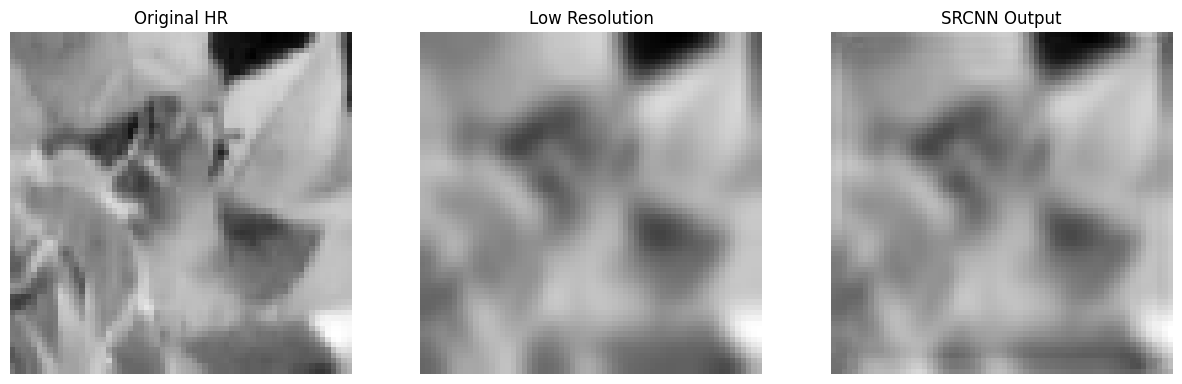

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize
from skimage.color import rgb2ycbcr, ycbcr2rgb

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    target_size = (64, 64)  # یا هر اندازه‌ای که برای آموزش مناسبه

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize کردن به سایز یکسان
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        x.append(lr_y)
        y.append(hr_y)

    x = np.expand_dims(np.array(x), -1)
    y = np.expand_dims(np.array(y), -1)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'  # تغییر بده به مسیر درست
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')  # فقط برای scale=2 در این مدل

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path)

# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)


# تست مدل روی یکی از تصاویر
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original HR')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


در سلول پایین موارد زیر اضافه شد:

To avoid border effects during training, all the convolutional
layers have no padding, and the network
produces a smaller output ((fsub 􀀀f1 􀀀f2 􀀀f3 +3)2 c).
The MSE loss function is evaluated only by the difference
between the central pixels of Xi and the network output.

Epoch 1/200
120/120 - 5s - 38ms/step - loss: 0.0094
Epoch 2/200
120/120 - 2s - 16ms/step - loss: 0.0014
Epoch 3/200
120/120 - 0s - 3ms/step - loss: 0.0011
Epoch 4/200
120/120 - 1s - 5ms/step - loss: 9.7862e-04
Epoch 5/200
120/120 - 0s - 3ms/step - loss: 8.9864e-04
Epoch 6/200
120/120 - 0s - 3ms/step - loss: 9.4458e-04
Epoch 7/200
120/120 - 1s - 5ms/step - loss: 8.3804e-04
Epoch 8/200
120/120 - 1s - 6ms/step - loss: 8.0002e-04
Epoch 9/200
120/120 - 0s - 4ms/step - loss: 7.5320e-04
Epoch 10/200
120/120 - 1s - 5ms/step - loss: 7.2980e-04
Epoch 11/200
120/120 - 0s - 4ms/step - loss: 7.4920e-04
Epoch 12/200
120/120 - 1s - 5ms/step - loss: 8.6006e-04
Epoch 13/200
120/120 - 0s - 4ms/step - loss: 7.0470e-04
Epoch 14/200
120/120 - 0s - 3ms/step - loss: 7.3391e-04
Epoch 15/200
120/120 - 1s - 5ms/step - loss: 7.4837e-04
Epoch 16/200
120/120 - 0s - 3ms/step - loss: 7.3571e-04
Epoch 17/200
120/120 - 0s - 3ms/step - loss: 6.9098e-04
Epoch 18/200
120/120 - 0s - 3ms/step - loss: 7.3849e-04
Epoch 19/20

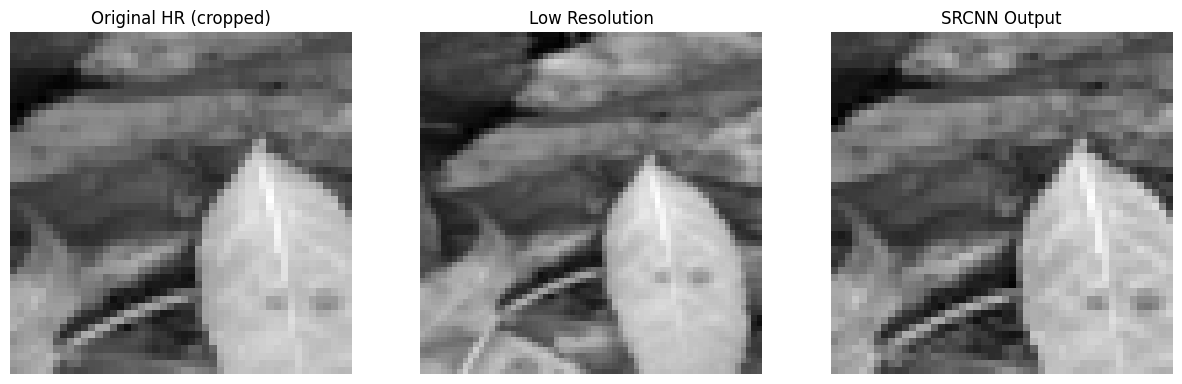

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


در سلول پایین موارد زیر اضافه شد:

The loss is minimized using stochastic gradient descent
with the standard backpropagation

Epoch 1/200
120/120 - 2s - 18ms/step - loss: 0.0508
Epoch 2/200
120/120 - 2s - 13ms/step - loss: 0.0049
Epoch 3/200
120/120 - 1s - 5ms/step - loss: 0.0047
Epoch 4/200
120/120 - 1s - 5ms/step - loss: 0.0046
Epoch 5/200
120/120 - 1s - 5ms/step - loss: 0.0044
Epoch 6/200
120/120 - 0s - 3ms/step - loss: 0.0043
Epoch 7/200
120/120 - 0s - 3ms/step - loss: 0.0042
Epoch 8/200
120/120 - 0s - 3ms/step - loss: 0.0041
Epoch 9/200
120/120 - 0s - 3ms/step - loss: 0.0040
Epoch 10/200
120/120 - 0s - 3ms/step - loss: 0.0039
Epoch 11/200
120/120 - 0s - 3ms/step - loss: 0.0038
Epoch 12/200
120/120 - 0s - 3ms/step - loss: 0.0038
Epoch 13/200
120/120 - 0s - 3ms/step - loss: 0.0037
Epoch 14/200
120/120 - 1s - 5ms/step - loss: 0.0036
Epoch 15/200
120/120 - 0s - 3ms/step - loss: 0.0035
Epoch 16/200
120/120 - 1s - 5ms/step - loss: 0.0035
Epoch 17/200
120/120 - 0s - 3ms/step - loss: 0.0034
Epoch 18/200
120/120 - 1s - 6ms/step - loss: 0.0034
Epoch 19/200
120/120 - 0s - 4ms/step - loss: 0.0033
Epoch 20/200
120/12

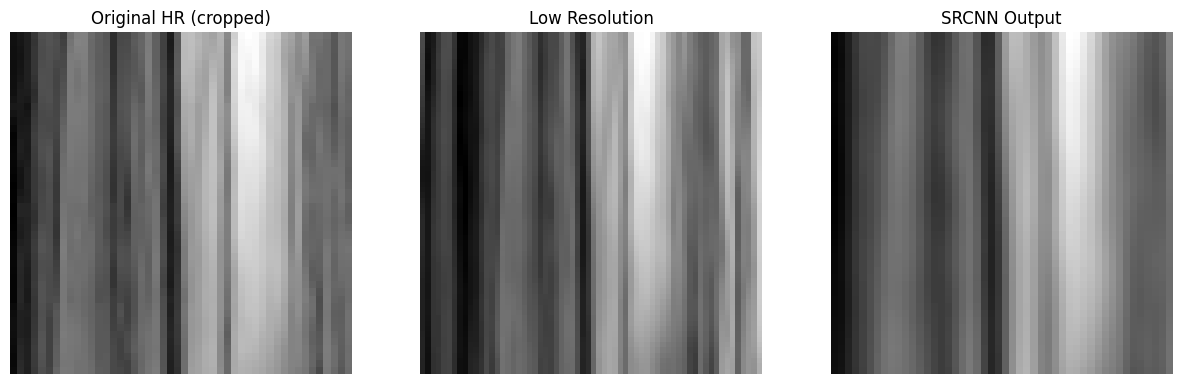

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

# تعریف optimizer مطابق مقاله
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse')


# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)

# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


در سلول پایین موارد زیر اضافه شد:

The filter weights of each layer are initialized by drawing
randomly from a Gaussian distribution with zero mean
and standard deviation 0.001 (and 0 for biases). The
learning rate is 10􀀀4 for the first two layers, and 10􀀀5 for
the last layer. We empirically find that a smaller learning
rate in the last layer is important for the network to
converge (similar to the denoising case [22]).

Epoch 1/50
120/120 - 2s - 13ms/step - loss: 0.2655
Epoch 2/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 3/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 4/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 5/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 6/50
120/120 - 0s - 3ms/step - loss: 0.2654
Epoch 7/50
120/120 - 1s - 5ms/step - loss: 0.2654
Epoch 8/50
120/120 - 1s - 5ms/step - loss: 0.2653
Epoch 9/50
120/120 - 0s - 4ms/step - loss: 0.2653
Epoch 10/50
120/120 - 1s - 5ms/step - loss: 0.2653
Epoch 11/50
120/120 - 1s - 5ms/step - loss: 0.2653
Epoch 12/50
120/120 - 0s - 4ms/step - loss: 0.2653
Epoch 13/50
120/120 - 1s - 5ms/step - loss: 0.2652
Epoch 14/50
120/120 - 0s - 3ms/step - loss: 0.2652
Epoch 15/50
120/120 - 1s - 5ms/step - loss: 0.2652
Epoch 16/50
120/120 - 1s - 5ms/step - loss: 0.2652
Epoch 17/50
120/120 - 0s - 3ms/step - loss: 0.2652
Epoch 18/50
120/120 - 0s - 3ms/step - loss: 0.2652
Epoch 19/50
120/120 - 0s - 3ms/step - loss: 0.2651
Epoch 20/50
120/120 - 0s - 3ms/step - l

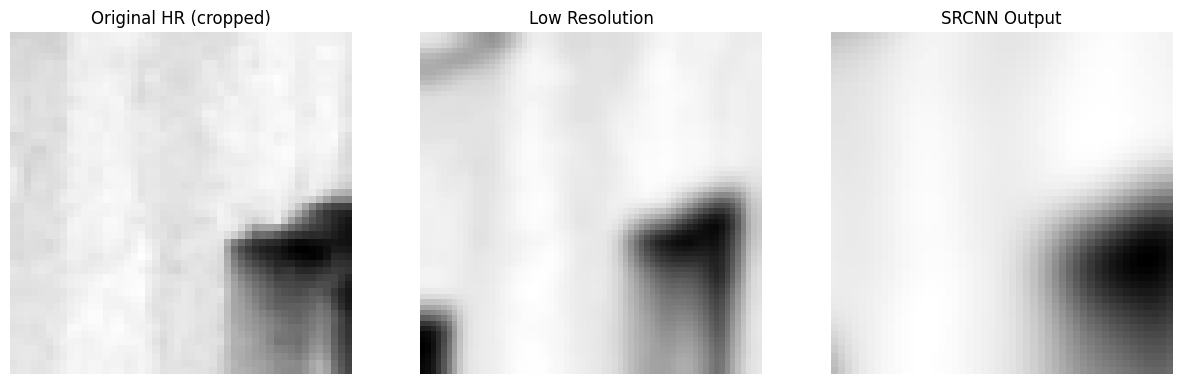

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir, target_size=(64, 64), crop=8):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        # برش مرکز HR به اندازه مناسب برای مطابقت با خروجی مدل
        hr_y_cropped = hr_y[crop:-crop, crop:-crop]

        x.append(lr_y)
        y.append(hr_y_cropped)

    x = np.expand_dims(np.array(x), -1)  # LR images (full)
    y = np.expand_dims(np.array(y), -1)  # HR center-cropped images (label)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')

# پارامترها
target_size = (64, 64)
crop = 8  # به خاطر padding='valid' و اندازه فیلترها

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path, target_size, crop)

# ساخت مدل SRCNN با padding='valid'
model = models.Sequential([
    layers.Input(shape=(target_size[0], target_size[1], 1)),
    layers.Conv2D(64, (9, 9), activation='relu', padding='valid'),
    layers.Conv2D(32, (5, 5), activation='relu', padding='valid'),
    layers.Conv2D(1, (5, 5), activation='linear', padding='valid')
])

# ساخت مدل SRCNN با padding='valid' و مقداردهی اولیه خاص
conv1 = layers.Conv2D(64, (9, 9), activation='relu', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv1')

conv2 = layers.Conv2D(32, (5, 5), activation='relu', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv2')

conv3 = layers.Conv2D(1, (5, 5), activation='linear', padding='valid',
                      kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001),
                      bias_initializer=tf.keras.initializers.Zeros(), name='conv3')

inputs = layers.Input(shape=(target_size[0], target_size[1], 1))
x = conv1(inputs)
x = conv2(x)
outputs = conv3(x)
model = models.Model(inputs, outputs)

# تنظیمات یادگیری مجزا
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss='mse')

# فریز موقت لایه‌ی آخر (warm-up)
model.get_layer('conv3').trainable = False

# آموزش اولیه فقط با دو لایه اول
model.fit(x_train, y_train, batch_size=4, epochs=50, verbose=2)

# فعال‌سازی مجدد لایه سوم
model.get_layer('conv3').trainable = True

# تعریف optimizer با نرخ یادگیری کمتر برای کل مدل
optimizer_fine = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(optimizer=optimizer_fine, loss='mse')

# آموزش نهایی مدل
model.fit(x_train, y_train, batch_size=4, epochs=200, verbose=2)


# تست مدل روی یک تصویر تصادفی
test_idx = np.random.randint(0, len(x_train))
test_lr = np.expand_dims(x_train[test_idx], axis=0)
test_hr = y_train[test_idx, ..., 0]  # already center-cropped

predicted = model.predict(test_lr)[0, ..., 0]

# ارزیابی
print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# نمایش نتایج
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original HR (cropped)')
plt.imshow(test_hr, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Low Resolution')
plt.imshow(test_lr[0, ..., 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('SRCNN Output')
plt.imshow(predicted, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import tensorflow as tf
from tensorflow.keras import layers, models
from glob import glob
from skimage.transform import resize
from skimage.color import rgb2ycbcr, ycbcr2rgb

# بارگذاری جفت تصاویر HR و LR
def load_dataset(hr_dir, lr_dir):
    hr_files = sorted(glob(os.path.join(hr_dir, '*')))
    lr_files = sorted(glob(os.path.join(lr_dir, '*')))

    x, y = [], []

    target_size = (64, 64)  # یا هر اندازه‌ای که برای آموزش مناسبه

    for hr_path, lr_path in zip(hr_files, lr_files):
        hr_img = io.imread(hr_path)
        lr_img = io.imread(lr_path)

        # روشنایی (Y channel)
        hr_y = color.rgb2ycbcr(hr_img)[:, :, 0] / 255.0
        lr_y = color.rgb2ycbcr(lr_img)[:, :, 0] / 255.0

        # resize کردن به سایز یکسان
        hr_y = resize(hr_y, target_size, anti_aliasing=True)
        lr_y = resize(lr_y, target_size, anti_aliasing=True)

        x.append(lr_y)
        y.append(hr_y)

    x = np.expand_dims(np.array(x), -1)
    y = np.expand_dims(np.array(y), -1)
    return x, y

# مسیر دیتاست‌ها
dataset_base = '/content/drive/MyDrive/basicCNN/train_images'  # تغییر بده به مسیر درست
hr_path = os.path.join(dataset_base, 'GT/x2')
lr_path = os.path.join(dataset_base, 'LR/x2')  # فقط برای scale=2 در این مدل

# بارگذاری داده‌ها
x_train, y_train = load_dataset(hr_path, lr_path)

# ساخت مدل SRCNN
model = models.Sequential([
    layers.Input(shape=(None, None, 1)),
    layers.Conv2D(64, (9,9), activation='relu', padding='same'),
    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.Conv2D(1, (5,5), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# آموزش مدل
model.fit(x_train, y_train, batch_size=4, epochs=100, verbose=2)



# تست مدل روی تصاویر رنگی در set5
for test_path in test_files:
    rgb_img = io.imread(test_path) / 255.0  # نرمال‌سازی
    ycbcr_img = rgb2ycbcr(rgb_img)

    y = ycbcr_img[:, :, 0]
    cb = ycbcr_img[:, :, 1]
    cr = ycbcr_img[:, :, 2]

    # تنظیم اندازه به مضرب scale
    h, w = y.shape
    h = (h // scale) * scale
    w = (w // scale) * scale

    y = y[:h, :w]
    cb = cb[:h, :w]
    cr = cr[:h, :w]

    # ساخت تصویر LR و آپ‌اسکیل‌شده
    lr_y = transform.resize(y, (h // scale, w // scale), anti_aliasing=True)
    lr_y = transform.resize(lr_y, (h, w), anti_aliasing=True)

    # پیش‌بینی کانال Y
    input_lr = np.expand_dims(lr_y, (0, -1))
    pred_y = model.predict(input_lr)[0, ..., 0]
    pred_y = np.clip(pred_y, 0.0, 1.0)

    # بازسازی تصویر رنگی
    recon_img = np.zeros((h, w, 3))
    recon_img[:, :, 0] = pred_y
    recon_img[:, :, 1] = cb
    recon_img[:, :, 2] = cr
    recon_rgb = ycbcr2rgb(recon_img)
    recon_rgb = np.clip(recon_rgb, 0.0, 1.0)

    # محاسبه PSNR و SSIM فقط روی Y
    psnr_val = psnr(y, pred_y, data_range=1.0)
    ssim_val = ssim(y, pred_y, data_range=1.0)

    print(f"نتیجه برای تصویر {os.path.basename(test_path)}:")
    print(f"PSNR (Y): {psnr_val:.2f}, SSIM (Y): {ssim_val:.4f}")

    # نمایش
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(rgb_img[:h, :w])
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Low Resolution')
    plt.imshow(np.stack([lr_y]*3, axis=-1))  # تصویر سیاه و سفید در قالب RGB
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('SRCNN Output')
    plt.imshow(recon_rgb)
    plt.axis('off')

    plt.show()



# # تست مدل روی یکی از تصاویر
# test_idx = np.random.randint(0, len(x_train))
# test_lr = np.expand_dims(x_train[test_idx], axis=0)
# test_hr = y_train[test_idx, ..., 0]

# predicted = model.predict(test_lr)[0, ..., 0]

# # ارزیابی
# print("PSNR:", psnr(test_hr, predicted, data_range=1.0))
# print("SSIM:", ssim(test_hr, predicted, data_range=1.0))

# # نمایش نتایج
# plt.figure(figsize=(15,5))
# plt.subplot(1,3,1)
# plt.title('Original HR')
# plt.imshow(test_hr, cmap='gray')
# plt.axis('off')

# plt.subplot(1,3,2)
# plt.title('Low Resolution')
# plt.imshow(test_lr[0, ..., 0], cmap='gray')
# plt.axis('off')

# plt.subplot(1,3,3)
# plt.title('SRCNN Output')
# plt.imshow(predicted, cmap='gray')
# plt.axis('off')

# plt.show()
